In [1]:
import pandas as pd
import numpy as np
import os
%matplotlib inline

In [2]:
from buildTest import getRegData, getClassiData
Xr_train,Xr_val,yr_train,yr_val = getRegData()
Xc_train,Xc_val,yc_train,yc_val = getClassiData()

In [3]:
os.chdir('../..')

In [4]:
from MLfromScratch.tree import DecisionTreeRegressor
from MLfromScratch.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
dtr = DecisionTreeRegressor()
dtr.fit(Xr_train,yr_train,max_depth=5)
dtr.score(Xr_val,yr_val),dtr.depth_

(0.6273851474985775, 5)

In [5]:
print(r2_score( yr_val, dtr.predict(Xr_val) ))
print(root_mean_squared_error(yr_val, dtr.predict(Xr_val)))

0.6273851474985775
5.154827461498392


In [6]:
from MLfromScratch.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(Xc_train,yc_train,max_depth=4)
dtc.score(Xc_val,yc_val)

0.9631336405529954

In [7]:
from MLfromScratch.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
y_true = yc_val
y_pred = dtc.predict(Xc_val)
y_score = dtc.predict_proba(Xc_val)[:,1]
print(accuracy_score(y_true,y_pred))
confusion_matrix(y_true,y_pred)

0.9631336405529954


array([[221,  13],
       [  3, 197]])

0.9712393162393163

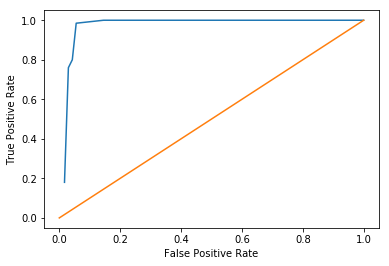

In [8]:
roc_curve(y_true,y_score,plot=True)
roc_auc_score(y_true,y_score)

In [9]:
from MLfromScratch.metrics import precision_score, recall_score, sensitivity_score, specificity_score, f1_score
precision_score(y_true,y_pred,), recall_score(y_true,y_pred), sensitivity_score(y_true,y_pred), specificity_score(y_true,y_pred), f1_score(y_true,y_pred)

(0.9380952380952381, 0.985, 0.985, 0.9444444444444444, 0.9609756097560974)